# Final Project
## Charisse Sobers
### 12/13/23

***

In [251]:
# Import packages
import pandas as pd
import numpy as np
import altair as alt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

#### Q1: Read in the data, call the dataframe "s"  and check the dimensions of the dataframe

In [230]:
# Read the CSV file
s = pd.read_csv('social_media_usage.csv')

# Check dimensions of the dataframe
print(s.shape)

# The s dataframe has 1,502 rows and 89 columns

(1502, 89)


***

#### Q2: Define a function called clean_sm that takes one input, x, and uses `np.where` to check whether x is equal to 1. If it is, make the value of x = 1, otherwise make it 0. Return x. Create a toy dataframe with three rows and two columns and test your function to make sure it works as expected

In [231]:
# Create function to clean sm_li column
def clean_sm(x):
        test = np.where(x==1, 1, 0)
        return test  

In [232]:
#Create toy dataframe
data = [[1,8],[5,3],[2,1]]
toy = pd.DataFrame(data, columns=['first_column', 'second_column'])
print(toy)

   first_column  second_column
0             1              8
1             5              3
2             2              1


In [233]:
#Test clean_sm function with toy dataframe
x = toy
test_run=clean_sm(x)
test_run

array([[1, 0],
       [0, 0],
       [0, 1]])

***

#### Q3: Create a new dataframe called "ss". The new dataframe should contain a target column called sm_li which should be a binary variable ( that takes the value of 1 if it is 1 and 0 otherwise (use clean_sm to create this) which indicates whether or not the individual uses LinkedIn, and the following features: income (ordered numeric from 1 to 9, above 9 considered missing), education (ordered numeric from 1 to 8, above 8 considered missing), parent (binary), married (binary), female (binary), and age (numeric, above 98 considered missing). Drop any missing values. Perform exploratory analysis to examine how the features are related to the target.

In [234]:
# Create ss dataframe per given criteria
ss = pd.DataFrame({
    "sm_li":np.where(s["web1h"] == 1, 1, clean_sm("web1h")),
    "income":np.where(s["income"] > 9, np.nan, s["income"]),
    "education":np.where(s["educ2"] > 8, np.nan, s["educ2"]),
    "parent":np.where(s["par"] == 1, 1, 0),
    "married":np.where(s["marital"] == 1, 1, 0),
    "female":np.where(s["gender"] == 2, 1, 0),
    "age":np.where(s["age"] > 98, np.nan, s["age"])})

In [235]:
#See ss dataframe output to check for accuracy vs csv
ss

,sm_li,income,education,parent,married,female,age
0,0,6.0,4.0,0,0,1,77.0
1,0,5.0,3.0,0,0,0,59.0
2,0,8.0,4.0,0,1,1,60.0
3,0,8.0,8.0,0,0,0,73.0
4,1,7.0,8.0,0,1,1,65.0
...,...,...,...,...,...,...,...
1497,0,6.0,4.0,1,1,0,41.0
1498,1,2.0,5.0,0,0,0,46.0
1499,0,7.0,3.0,0,0,0,18.0
1500,0,4.0,3.0,0,0,1,23.0


***

#### Q4: Create a target vector (y) and feature set (X)

In [236]:
# Drop missing data
ss = ss.dropna()

In [237]:
# Create target vector and feature set
y = ss["sm_li"]
X = ss[["income", "education", "parent", "married","female","age"]]

***

#### Q5: Split the data into training and test sets. Hold out 20% of the data for testing. Explain what each new object contains and how it is used in machine learning

In [246]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,       
                                                    test_size=0.2,    
                                                    random_state=987) 

Our training data is comprised of 1,008 rows and 6 columns. X_train and y_train contain 80% of our dataset and are used to train/fit our model.

Our test data is comprised of 252 rows and 6 columns. X_test and y_test contain 20% of our dataset and are used to test if our model provides an accurate fit. 


***

#### Q6: Instantiate a logistic regression model and set class_weight to balanced. Fit the model with the training data.

In [247]:
#Initialize lrm with class weight set to balanced 
lr = LogisticRegression(class_weight='balanced')

#Fit model with training data
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

***

#### Q7: Evaluate the model using the testing data. What is the model accuracy for the model? Use the model to make predictions and then generate a confusion matrix from the model. Interpret the confusion matrix and explain what each number means.

In [248]:
# Make predictions
y_pred = lr.predict(X_test)

In [249]:
# Model accuracy using metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
Accuracy

0.6904761904761905

The model accuracy is .69. This means 69% of the time the model is correct. 

In [252]:
# Generate Basic Confusion Matrix to compare predictions to test data
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,111,57
1,21,63


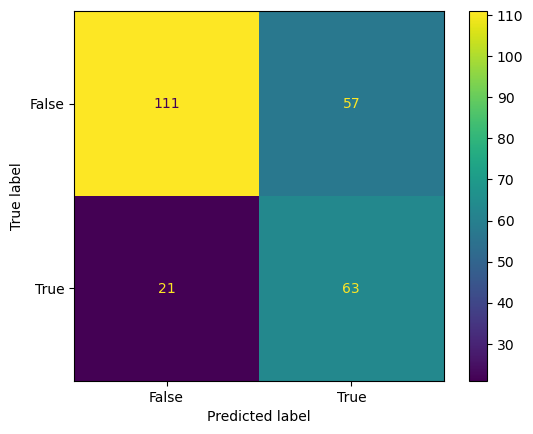

In [243]:
# Generate Colorful Confusion Matrix to compare predictions to test data
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

The confusion matrix created is one measure of how strong the logistic regression model is. Our matrix values can be interpreted as follows: 63 true positives, 57 false positives, 21 false negatives, and 111 true negatives. Further broken down this means 63 samples were positive and classified correctly, 57 samples were classified as positive when they were actually negative, 21 samples were classified as negative when they were actually positive, and 111 samples were negative and classified correctly.

***

#### Q8: Create the confusion matrix as a dataframe and add informative column names and index names that indicate what each quadrant represents

In [254]:
# Create dataframe of Confusion Matrix called cmdf
cmdf = pd.DataFrame(confusion_matrix(y_test, y_pred),
            columns=["Predicted negative", "Predicted positive"],
            index=["Actual negative","Actual positive"]).style.background_gradient(cmap="PiYG")
cmdf

,Predicted negative,Predicted positive
Actual negative,111,57
Actual positive,21,63


***

#### Q9: Aside from accuracy, there are three other metrics used to evaluate model performance: precision, recall, and F1 score. Use the results in the confusion matrix to calculate each of these metrics by hand. Discuss each metric and give an actual example of when it might be the preferred metric of evaluation. After calculating the metrics by hand, create a classification_report using sklearn and check to ensure your metrics match those of the classification_report.

In [198]:
# Precision Manually: TP/(TP+FP) 
63/(63+57)

0.525

In [199]:
#Precision using metrics
Precision = metrics.precision_score(y_test,y_pred)
Precision

0.525

Precision tells us that of the positives predicted 53% were truly positive. This metric can be used if we want to see if our model correctly predicted positives. It might be the preferred metric of evaluation when the goal is to minimize incorrectly predicting positive cases. Ex. COVID tests, STD tests or cancer screenings

In [200]:
# Recall Manually: TP/(TP+FN)
63/(63+21)

0.75

In [140]:
# Recall using metrics
Sensitivity_recall = metrics.recall_score(y_test,y_pred)
Sensitivity_recall

0.75

Recall, also known as sensitivity, tells us that of all the positive cases 62% are predicted positive.This metric can be used if we want to understand how welll the model predicts positives. It might be the preferred metric of evaluation when the goal is to minimize the chance of mising positive cases. Ex. fraud

In [201]:
#F1 Score Manually
2*((.525*.75)/(.525+.75))

0.6176470588235295

In [136]:
# F1 Score using metrics
F1_score = metrics.f1_score(y_test,y_pred)
F1_score

0.6176470588235295

F1 Score combines both previously mentioned metrics , precision and recall. It measures how effectively our models evaluate between the two metrics. Unlike precision and recall it considers false positive and false negative samples. It might be the preferred metric of evaluation when the goal is to examine data that is unbalanced. Ex. Fraud cases where 90% of the data belong to one class (not fradulent) and 10% belong to another (fradulent)

In [202]:
# Generate Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74       168
           1       0.53      0.75      0.62        84

    accuracy                           0.69       252
   macro avg       0.68      0.71      0.68       252
weighted avg       0.74      0.69      0.70       252



***

#### Q10: Use the model to make predictions. For instance, what is the probability that a high income (e.g. income=8), with a high level of education (e.g. 7), non-parent who is married female and 42 years old uses LinkedIn? How does the probability change if another person is 82 years old, but otherwise the same?

In [268]:
# New data for predictions
newdata = pd.DataFrame({
    "income": [8, 8],
    "education": [7, 7],
    "parent": [0, 0],
    "married": [1, 1],
    "female": [1, 1],
    "age": [42, 82]
})

In [269]:
newdata

,income,education,parent,married,female,age
0,8,7,0,1,1,42
1,8,7,0,1,1,82


In [270]:
# Use model to make predictions
newdata["sm_li"] = lr.predict(newdata)

In [271]:
newdata

,income,education,parent,married,female,age,sm_li
0,8,7,0,1,1,42,1
1,8,7,0,1,1,82,0


In [258]:
# New data for features: income, education, parent, married, female, age
person = [8, 7, 0, 1, 1, 42]

# Predict class, given input features
predicted_class = lr.predict([person])

# Generate probability of positive class (=1)
probs = lr.predict_proba([person])

C:\Users\cs1983\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\cs1983\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [260]:
# Print predicted class and probability
print(f"Predicted class: {predicted_class[0]}") #0 = not a LinkedIn user, 1=LinkedIn user
print(f"Probability that this person is a LinkedIn user: {probs[0][1]}")

Predicted class: 1
Probability that this person is a LinkedIn user: 0.7316616927547672


In [261]:
# New data for features: income, education, parent, married, female, age
person = [8, 7, 0, 1, 1, 82]

# Predict class, given input features
predicted_class = lr.predict([person])

# Generate probability of positive class (=1)
probs = lr.predict_proba([person])

C:\Users\cs1983\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\cs1983\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [263]:
# Print predicted class and probability
print(f"Predicted class: {predicted_class[0]}") #0 = not a LinkedIn user, 1=LinkedIn user
print(f"Probability that this person is a LinkedIn user: {probs[0][1]}")

Predicted class: 0
Probability that this person is a LinkedIn user: 0.4710475425964336


***